In [ ]:
#Install Dependencies and get data

In [1]:
import os
import polars as pl
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
pl.read_csv??

In [2]:
train_path=os.path.join('train.csv','train.csv')

In [3]:
df=pd.read_csv(os.path.join(train_path))

In [4]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
df.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [6]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [ ]:
#Preprocessing= Tokenization

In [7]:
from tensorflow.keras.layers import TextVectorization

In [8]:
X=df['comment_text']
y=df[df.columns[2:]].values

In [9]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [10]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [11]:
MAX_FEATURES=200000  #number of words in the vocab

In [12]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')

In [13]:
vectorizer.adapt(X.values)

In [14]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [15]:
vectorizer('Hi Dad, Thank You!')[:4]

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 171, 4056,  124,    7], dtype=int64)>

In [16]:
vectorized_text=vectorizer(X.values)

In [17]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [18]:
#MCSHBAP=map,cache,shuffle,batch,prefetch from tensor_slices,list_file
#data pipeline
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)#helps prevent bottlenecks

In [19]:
batch_X, batch_y=dataset.as_numpy_iterator().next()

In [20]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
train_generator=train.as_numpy_iterator()
test_generator=test.as_numpy_iterator()
val_generator=val.as_numpy_iterator()

In [22]:
train_generator.next()

(array([[    41,     25,      6, ...,      0,      0,      0],
        [    70,      2,  38668, ...,      0,      0,      0],
        [     5,      8,     88, ...,      0,      0,      0],
        ...,
        [   929,    888,    635, ...,      0,      0,      0],
        [  1665, 115205,    117, ...,      0,      0,      0],
        [   347,     12,     59, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [ ]:
#Deep Nueral Network

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [25]:
y[0]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
model=Sequential()
#create embedding layer
model.add(Embedding(MAX_FEATURES+1,32))

#Creating Bidirectional(because forward and backward word. eg: I dont hate you) LSTM layer needs activation to be tanh
model.add(Bidirectional(LSTM(32,activation='tanh')))

#Feature extractor Fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

#Final layer
model.add(Dense(6,activation='sigmoid'))

In [27]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [75]:
history=model.fit(train,epochs=8,validation_data=val)

Epoch 1/8
  35/6981 [..............................] - ETA: 1:32:27 - loss: 0.0363

KeyboardInterrupt: 

In [31]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

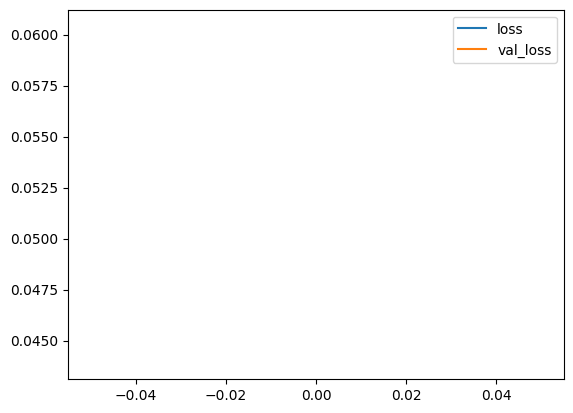

In [32]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
#make predictions

In [33]:
batch=test.as_numpy_iterator().next()

In [71]:
input_text=vectorizer('I hate you')

In [72]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  8, 363,   7, ...,   0,   0,   0], dtype=int64)>

In [73]:
res=model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 89ms/step


In [51]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [74]:
res

array([[0.55461013, 0.00525861, 0.16618457, 0.01290558, 0.18922356,
        0.02939013]], dtype=float32)

In [64]:
batch_X,batch_y=test.as_numpy_iterator().next()

In [63]:
batch=test.as_numpy_iterator().next()

In [65]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 0s 120ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
#Evaluate the Model

In [66]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [76]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [77]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 154ms/step


In [78]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.831045389175415, Recall:0.6734169721603394, Accuracy:0.43831494450569153


In [ ]:
#Gradio App and testing

In [79]:
model.save('toxicity.h5')

In [80]:
model=tf.keras.models.load_model('toxicity.h5')

In [94]:
inpu='Fuck you'

In [98]:
input_str=vectorizer([inpu])

In [100]:
res=model.predict(input_str,0)

1/1 [==============================] - 0s 100ms/step


In [101]:
res

array([[0.9961365 , 0.18850723, 0.9622001 , 0.02620097, 0.7596228 ,
        0.12529306]], dtype=float32)

In [89]:
import gradio as gr

In [88]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [90]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [93]:
interface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://50c2fa01c3d7033434.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 320ms/step
